# <span style="color: skyblue; font-size: 2.0em; font-weight: bold;">Predictive Analysis of Direct Marketing Campaigns for Term Deposits 📊</span>



**This project examines direct marketing campaigns executed by a bank through phone calls. The main goal is to predict whether a client will sign up for a term deposit. This prediction is essential for enhancing marketing strategies and boosting the efficiency of campaigns.**<br/>
## <span style="color: skyblue; font-size: 1.0em; font-weight: bold;">Classification Goal<span/>
**The goal is to predict whether a client will subscribe ('yes') or not ('no') to a term deposit (y). This prediction leverages client data and campaign interaction details to build accurate predictive models.**
## <span style="color: skyblue; font-size: 1.0em; font-weight: bold;"> Dataset Characteristics<span/>

**Multivariate**: The dataset includes multiple features that can influence the outcome.<br/>
**Subject Area**: Business and Marketing Analytics.<br/>
**Associated Tasks**: Classification, Predictive Modeling.<br/>
**Feature Types**: Categorical and Integer.<br/>
**Instances**: 45,211 records.<br/>
**Features**: 16 variables, including client demographics, contact details, and campaign specifics.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## <span style="color: skyblue; font-size: 1.0em; font-weight: bold;">Libraries used:<span/>
**Pandas**:is a powerful data analysis and manipulation library for Python. It provides data structures (like DataFrame and Series) to work with structured data easily and efficiently.<br /> 
**NumPy**:(Numerical Python) is a fundamental package for numerical computing in Python. <br /> 
**Matplotlib**:is a 2D plotting library for Python that produces publication-quality figures in a variety of formats and interactive environments across platforms.<br /> 
**Seaborn**:is built on top of Matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics.<br /> 
**Scikit-learn**:is a machine learning library for Python that provides simple and efficient tools for data mining and data analysis tasks.<br /> 

In [5]:
df_full=pd.read_csv("bank-additional-full.csv",sep=",")


In [6]:
pd.set_option('display.max_columns', None)

*Here we are using **bank-additional-full.csv** with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014][NOTE: This dataset was chosen because it has fewer unknown values compared to the other datasets provide.]*

In [8]:
df_full

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## <span style="color: skyblue; font-size: 1.0em; font-weight: bold;">DATASET INFORMATION: <span/>

*The data is related with direct marketing campaigns of a banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.*


| Variable Name | Role    | Type        | Demographic       | Description                                                                                                                                                                                                                  |
|---------------|---------|-------------|-------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| age           | Feature | Integer     | Age               |                                                                                                                                                                                                                              |
| job           | Feature | Categorical | Occupation        | type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')                                                 |
| marital       | Feature | Categorical | Marital Status    | marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)                                                                                                            |
| education     | Feature | Categorical | Education Level   | (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')                                                                                               |
| default       | Feature | Binary      |                   | has credit in default?                                                                                                                                                                                                      |
| balance       | Feature | Integer     |                   | average yearly balance                                                                                                                                                                                                      |
| housing       | Feature | Binary      |                   | has housing loan?                                                                                                                                                                                                           |
| loan          | Feature | Binary      |                   | has personal loan?                                                                                                                                                                                                          |
| contact       | Feature | Categorical |                   | contact communication type (categorical: 'cellular','telephone')                                                                                                                                                            |
| day_of_week   | Feature | Date        |                   | last contact day of the week                                                                                                                                                                                                |
| month         | Feature | Date        |                   | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                                                                                                             |
| duration      | Feature | Integer     |                   | last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. |
| campaign      | Feature | Integer     |                   | number of contacts performed during this campaign and for this client (numeric, includes last contact)                                                                                                                       |
| pdays         | Feature | Integer     |                   | number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)                                                                           |
| previous      | Feature | Integer     |                   | number of contacts performed before this campaign and for this client                                                                                                                                                        |
| poutcome      | Feature | Categorical |                   | outcome of the previous marketing campaign (categorical: 'failure','nonexisten|t','success')                                                                                                                                 |
| y             | Target  | Binary      |                   | has the client subscribed|e                o             |

          |

### <span style="color: skyblue; font-size: 1.0em; font-weight: bold;">Renaming columns<span/>

*Renaming columns in a dataset is typically done to improve clarity, consistency, and usability of the data.*

In [12]:
df_full= df_full.rename(columns= {'housing':'h_loan','loan':"p_loan"})

In [13]:
len(df_full.columns)

21

In [14]:
df_full = df_full.drop(columns=['contact','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','default'])

In [15]:
len(df_full.columns)

14

In [16]:
df_full['poutcome'].value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

In [17]:
df_full['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [18]:
df_full.to_csv("bankfulladd.csv")

In [19]:
df_full=pd.read_csv('bankfulladd.csv')

## <span style="color: skyblue; font-size: 1.0em; font-weight: bold;"> Replacing unknown value with MODE<span/>

*We use mode for **categorical values**  replacing unknown values with the mode is a practical approach to ensure data completeness and reliability, which are crucial for accurate analysis and modeling in data science and machine learning tasks.learning applications .*

In [21]:
mode_edu = df_full['education'].mode()[0]
mode_job = df_full['job'].mode()[0]
mode_hl = df_full['h_loan'].mode()[0]
mode_pl = df_full['p_loan'].mode()[0]

In [22]:
print(mode_edu , mode_job, mode_hl, mode_pl)

university.degree admin. yes no


In [23]:
df_full.loc[df_full['education'] == 'unknown', 'education'] = mode_edu
df_full.loc[df_full['job'] == 'unknown', 'job'] = mode_job
df_full.loc[df_full['h_loan'] == 'unknown', 'h_loan'] = mode_hl
df_full.loc[df_full['p_loan'] == 'unknown', 'p_loan'] = mode_pl


In [24]:
df_full.isnull().sum()

Unnamed: 0     0
age            0
job            0
marital        0
education      0
h_loan         0
p_loan         0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [25]:
df_full['education'].value_counts()

education
university.degree      13899
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: count, dtype: int64

In [26]:
df_full['job'].value_counts()

job
admin.           10752
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64

In [27]:
df_full['p_loan'].value_counts()

p_loan
no     34940
yes     6248
Name: count, dtype: int64

In [28]:
df_full['h_loan'].value_counts()

h_loan
yes    22566
no     18622
Name: count, dtype: int64

## <span style="color: skyblue; font-size: 1.0em; font-weight: bold;">Converting target variable(y) to binary variable<span/>

*converting the target variable 
y to a binary format is essential for aligning with the requirements of classification algorithms, simplifying the problem, facilitating model evaluation, and making interpretable predictions. It enhances the overall effectiveness and applicability of machine learning models in real-world scenarios.*

In [30]:
df_full['y'] = df_full['y'].map({'yes': 1, 'no': 0})

In [31]:
df_full.head()

,Unnamed: 0,age,job,marital,education,h_loan,p_loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,0,56,housemaid,married,basic.4y,no,no,may,mon,261,1,999,0,nonexistent,0
1,1,57,services,married,high.school,no,no,may,mon,149,1,999,0,nonexistent,0
2,2,37,services,married,high.school,yes,no,may,mon,226,1,999,0,nonexistent,0
3,3,40,admin.,married,basic.6y,no,no,may,mon,151,1,999,0,nonexistent,0
4,4,56,services,married,high.school,no,yes,may,mon,307,1,999,0,nonexistent,0


In [32]:
df_full['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

## <span style="color: skyblue; font-size: 1.0em; font-weight: bold;">Encoding educational values to numeric value<span/>

*We have determined that the 'education' column can be a critical factor influencing the target variable. education alone may not determine someone's decision to take a term deposit, it can serve as a proxy for financial knowledge, stability, risk perception, and decision-making processes—all of which can influence financial behaviors, including the choice to invest in term deposits.*

In [35]:
# Define the mapping dictionary
education_mapping = {
    'university.degree': 1,
    'high.school': 2,
    'basic.9y': 3,
    'professional.course': 4,
    'basic.4y': 5,
    'basic.6y': 6,
    'illiterate': 7
}

# Encode the 'education' column in place using .loc
df_full.loc[:, 'education'] = df_full['education'].map(education_mapping)
df_full

,Unnamed: 0,age,job,marital,education,h_loan,p_loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,0,56,housemaid,married,5,no,no,may,mon,261,1,999,0,nonexistent,0
1,1,57,services,married,2,no,no,may,mon,149,1,999,0,nonexistent,0
2,2,37,services,married,2,yes,no,may,mon,226,1,999,0,nonexistent,0
3,3,40,admin.,married,6,no,no,may,mon,151,1,999,0,nonexistent,0
4,4,56,services,married,2,no,yes,may,mon,307,1,999,0,nonexistent,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,41183,73,retired,married,4,yes,no,nov,fri,334,1,999,0,nonexistent,1
41184,41184,46,blue-collar,married,4,no,no,nov,fri,383,1,999,0,nonexistent,0
41185,41185,56,retired,married,1,yes,no,nov,fri,189,2,999,0,nonexistent,0
41186,41186,44,technician,married,4,no,no,nov,fri,442,1,999,0,nonexistent,1


In [36]:
df_full['education'].value_counts()

education
1    13899
2     9515
3     6045
4     5243
5     4176
6     2292
7       18
Name: count, dtype: int64

In [37]:
df_full

,Unnamed: 0,age,job,marital,education,h_loan,p_loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,0,56,housemaid,married,5,no,no,may,mon,261,1,999,0,nonexistent,0
1,1,57,services,married,2,no,no,may,mon,149,1,999,0,nonexistent,0
2,2,37,services,married,2,yes,no,may,mon,226,1,999,0,nonexistent,0
3,3,40,admin.,married,6,no,no,may,mon,151,1,999,0,nonexistent,0
4,4,56,services,married,2,no,yes,may,mon,307,1,999,0,nonexistent,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,41183,73,retired,married,4,yes,no,nov,fri,334,1,999,0,nonexistent,1
41184,41184,46,blue-collar,married,4,no,no,nov,fri,383,1,999,0,nonexistent,0
41185,41185,56,retired,married,1,yes,no,nov,fri,189,2,999,0,nonexistent,0
41186,41186,44,technician,married,4,no,no,nov,fri,442,1,999,0,nonexistent,1


## <span style="color: skyblue; font-size: 1.0em; font-weight: bold;">Dropping dupilcates<span/>

*[Duplicate rows are removed]*
*dropping duplicates is essential to ensure data quality, improve analysis accuracy, enhance computational efficiency, maintain consistency, and normalize datasets for better decision-making and modeling outcomes.*

In [40]:
df_full.drop_duplicates(inplace=True)

In [41]:
df_full

,Unnamed: 0,age,job,marital,education,h_loan,p_loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,0,56,housemaid,married,5,no,no,may,mon,261,1,999,0,nonexistent,0
1,1,57,services,married,2,no,no,may,mon,149,1,999,0,nonexistent,0
2,2,37,services,married,2,yes,no,may,mon,226,1,999,0,nonexistent,0
3,3,40,admin.,married,6,no,no,may,mon,151,1,999,0,nonexistent,0
4,4,56,services,married,2,no,yes,may,mon,307,1,999,0,nonexistent,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,41183,73,retired,married,4,yes,no,nov,fri,334,1,999,0,nonexistent,1
41184,41184,46,blue-collar,married,4,no,no,nov,fri,383,1,999,0,nonexistent,0
41185,41185,56,retired,married,1,yes,no,nov,fri,189,2,999,0,nonexistent,0
41186,41186,44,technician,married,4,no,no,nov,fri,442,1,999,0,nonexistent,1


In [42]:
df_full.to_csv('finaldupesremoved.csv', index=False)

## <span style="color: skyblue; font-size: 1.0em; font-weight: bold;">Verifying the data type of education column<span/>

In [44]:
education_dtype = df_full.dtypes['education']
print(f"The data type of the 'education' column is: {education_dtype}")
df_full['education'] = df_full['education'].astype('int64')
df_full['education'].dtypes

The data type of the 'education' column is: object


dtype('int64')

[*The datatype of the Education column was manually changed here to 'int64'*]

## <span style="color: skyblue; font-size: 1.0em; font-weight: bold;">Creating seperate dataframe into categorical and numeric<span/>

*We are creating seperate data frames for further encoding(one hot encoding ) because one hot encoding converts multidimensional **categorical** values to binary numeric values.*

In [48]:
cat_columns = df_full.select_dtypes(include=['object']).columns
num_columns = df_full.select_dtypes(include=['int64','float64','bool']).columns

In [49]:
df_fullcat=df_full[cat_columns]
df_fullcat

,job,marital,h_loan,p_loan,month,day_of_week,poutcome
0,housemaid,married,no,no,may,mon,nonexistent
1,services,married,no,no,may,mon,nonexistent
2,services,married,yes,no,may,mon,nonexistent
3,admin.,married,no,no,may,mon,nonexistent
4,services,married,no,yes,may,mon,nonexistent
...,...,...,...,...,...,...,...
41183,retired,married,yes,no,nov,fri,nonexistent
41184,blue-collar,married,no,no,nov,fri,nonexistent
41185,retired,married,yes,no,nov,fri,nonexistent
41186,technician,married,no,no,nov,fri,nonexistent


In [50]:
df_fullnum=df_full[num_columns]
df_fullnum

,Unnamed: 0,age,education,duration,campaign,pdays,previous,y
0,0,56,5,261,1,999,0,0
1,1,57,2,149,1,999,0,0
2,2,37,2,226,1,999,0,0
3,3,40,6,151,1,999,0,0
4,4,56,2,307,1,999,0,0
...,...,...,...,...,...,...,...,...
41183,41183,73,4,334,1,999,0,1
41184,41184,46,4,383,1,999,0,0
41185,41185,56,1,189,2,999,0,0
41186,41186,44,4,442,1,999,0,1


In [51]:
df_full[num_columns].to_csv('finalnum_data.csv', index=False)

In [52]:
df_full[cat_columns].to_csv('finalcat_data.csv', index=False)

## <span style="color: skyblue; font-size: 1.0em; font-weight: bold;">ONE HOT ENCODING<span/>

*One hot encoding is a technique used in data preprocessing to convert categorical variables into a format that can be more easily used for machine learning algorithms.*

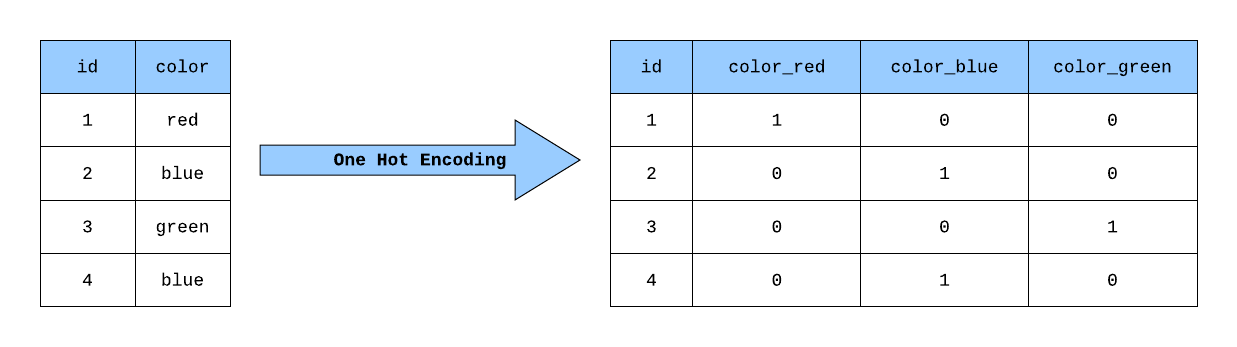

*One-hot encoding is typically preferred when dealing with categorical variables that lack intrinsic order or hierarchy, ensuring that models interpret the data correctly without introducing unintended biases or assumptions.*

In [57]:
df_fullcat = pd.get_dummies(df_fullcat,drop_first=True)

*In the Pandas library, get_dummies() is used to convert categorical variables into dummy/indicator variables.*

In [59]:
df_fullcat

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,marital_unknown,h_loan_yes,p_loan_yes,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
1,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
2,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
4,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
41184,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
41185,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
41186,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False


In [60]:
df_fullnum

,Unnamed: 0,age,education,duration,campaign,pdays,previous,y
0,0,56,5,261,1,999,0,0
1,1,57,2,149,1,999,0,0
2,2,37,2,226,1,999,0,0
3,3,40,6,151,1,999,0,0
4,4,56,2,307,1,999,0,0
...,...,...,...,...,...,...,...,...
41183,41183,73,4,334,1,999,0,1
41184,41184,46,4,383,1,999,0,0
41185,41185,56,1,189,2,999,0,0
41186,41186,44,4,442,1,999,0,1


## <span style="color: skyblue; font-size: 1.0em; font-weight: bold;"> Concatinating numeric and encoded dataframe<span/>

In [62]:
df_combined = pd.concat([df_fullnum, df_fullcat], axis=1)

**df_fullcat + df_fullnum =  df_combined**

In [64]:
df_combined

,Unnamed: 0,age,education,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,marital_unknown,h_loan_yes,p_loan_yes,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,56,5,261,1,999,0,0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
1,1,57,2,149,1,999,0,0,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
2,2,37,2,226,1,999,0,0,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
3,3,40,6,151,1,999,0,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
4,4,56,2,307,1,999,0,0,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,41183,73,4,334,1,999,0,1,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
41184,41184,46,4,383,1,999,0,0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
41185,41185,56,1,189,2,999,0,0,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
41186,41186,44,4,442,1,999,0,1,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False


## <span style="color: skyblue; font-size: 1.0em; font-weight: bold;">HANDLING IMBALANCED DATA USING SMOTE<span/>

**SMOTE** *(Synthetic Minority Over-sampling Technique) is a technique used to address the class imbalance in datasets where one class (usually the minority class) is significantly underrepresented compared to the other class(es).*

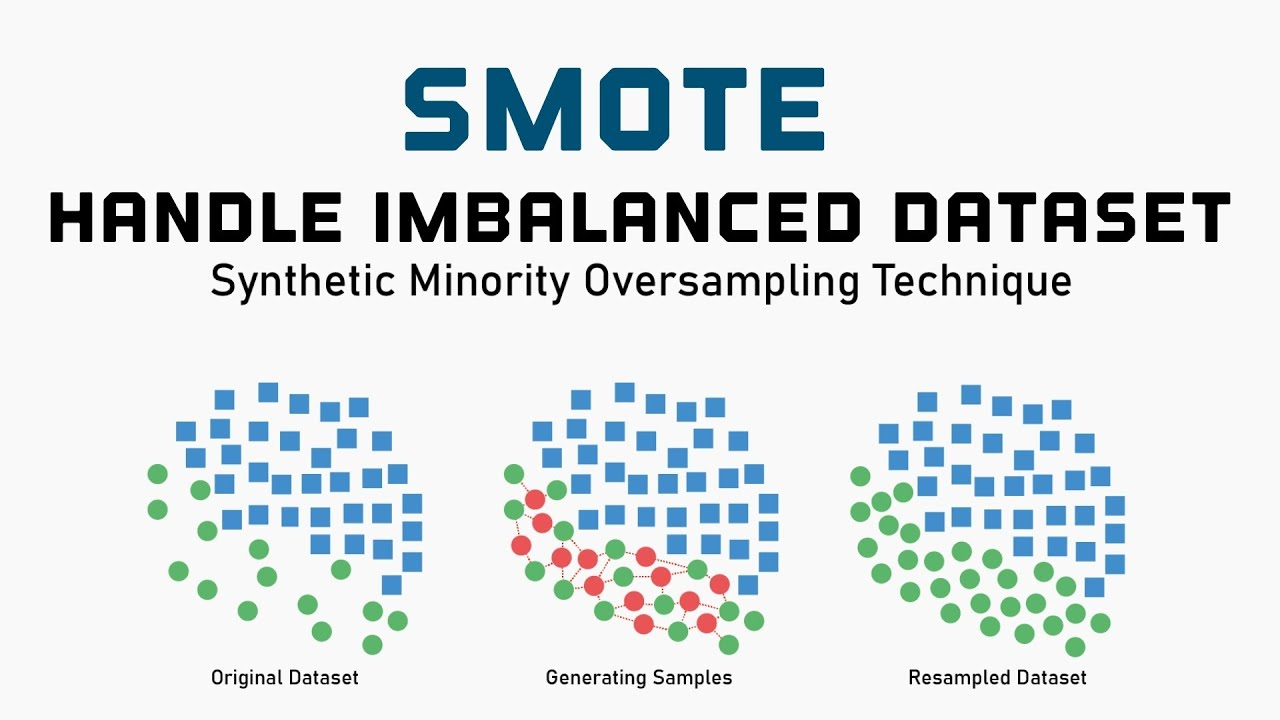

*In the figure above we can visually understand the process of balancing the dataset for better prediction. The class with lesser number of datapoints or instances (in our case the target variable y has way less 0s than 1s). We create new instances referencing the orginal ones to balance the minority and majority class.*

In [68]:
X = df_combined.drop('y', axis=1)
y = df_combined['y']

In [69]:
from imblearn.over_sampling import SMOTE

In [70]:
smt=SMOTE()

In [71]:
X ,y=smt.fit_resample(X,y)


In [72]:
y.value_counts()

y
0    36548
1    36548
Name: count, dtype: int64

## <span style="color: skyblue; font-size: 1.0em; font-weight: bold;">Exploratory Data Analysis (EDA)<span/>

***Exploratory Data Analysis (EDA)** is a crucial step in the data analysis process. It involves summarizing the main characteristics of a dataset, often using visual methods, before making any assumptions or conclusions. The goal of EDA is to understand the data, detect patterns, anomalies, test hypotheses, and check assumptions with the help of summary statistics and graphical representations.*

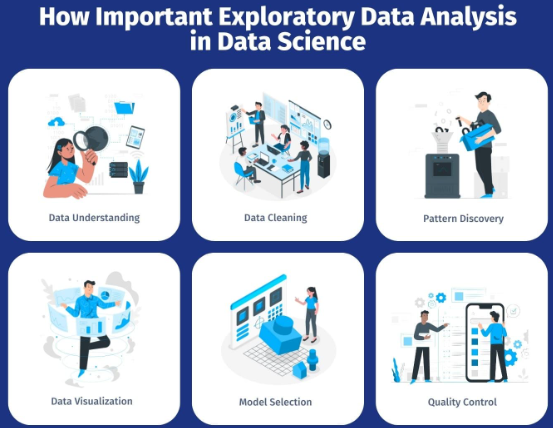

In [74]:
avg_calls = df_combined.groupby('age')['campaign'].mean().reset_index()

In [75]:
avg_calls.columns=['age','avg_campaign']

Text(0, 0.5, 'Average Number of Calls')

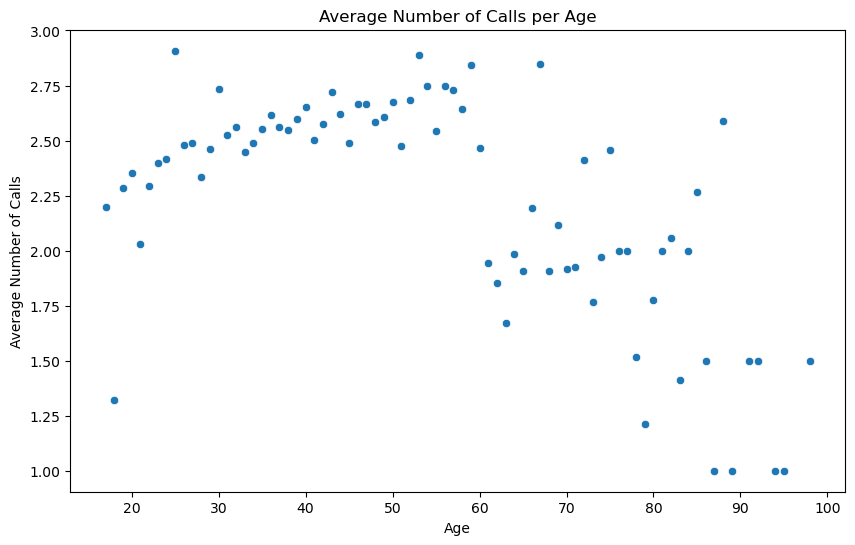

In [76]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age',y='avg_campaign',data=avg_calls)
plt.title('Average Number of Calls per Age')
plt.xlabel('Age')
plt.ylabel('Average Number of Calls')


**The Scatter Plot shows that from the age of around 20 to the age of 60 the average number of calls made *increase*. From the age of 60 to 100 the class *decrease*.**

In [78]:
grouped_data = df_combined[['age','y']]
grouped_data

,age,y
0,56,0
1,57,0
2,37,0
3,40,0
4,56,0
...,...,...
41183,73,1
41184,46,0
41185,56,0
41186,44,1


In [79]:
bins = range(0, 101, 10)
labels = [f'{i}-{i+10}' for i in bins[:-1]]

# Create a new column 'age_range' with the defined bins
grouped_data.loc[:, 'age_range'] = pd.cut(grouped_data['age'], bins=bins, labels=labels, right=False)


grouped_data

C:\Users\priya\AppData\Local\Temp\ipykernel_18000\1037491717.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_data.loc[:, 'age_range'] = pd.cut(grouped_data['age'], bins=bins, labels=labels, right=False)


,age,y,age_range
0,56,0,50-60
1,57,0,50-60
2,37,0,30-40
3,40,0,40-50
4,56,0,50-60
...,...,...,...
41183,73,1,70-80
41184,46,0,40-50
41185,56,0,50-60
41186,44,1,40-50


*Bins are used to convert age into age range. **Bins** are predefined intervals that divide the range of data values into segments. Each bin covers a specific range of data points, and the count of data points falling within each bin is recorded.*

**Now we are creating three dataframes using age ranges and y to visually understand their relationship**

In [81]:
grouped_data = grouped_data.groupby('age_range', observed=True)['y'].count().reset_index()

In [82]:
grouped_data

,age_range,y
0,10-20,75
1,20-30,5594
2,30-40,16938
3,40-50,10526
4,50-60,6862
5,60-70,724
6,70-80,319
7,80-90,140
8,90-100,10


In [83]:
grouped_data= grouped_data.rename(columns= {'y':'y_all'})

*Contains age ranges and sum of all the responses of y*

In [85]:
grouped_data

,age_range,y_all
0,10-20,75
1,20-30,5594
2,30-40,16938
3,40-50,10526
4,50-60,6862
5,60-70,724
6,70-80,319
7,80-90,140
8,90-100,10


In [86]:
positive_df = df_combined[['age','y']]

In [87]:
bins = range(0, 101, 10)
labels = [f'{i}-{i+10}' for i in bins[:-1]]

# Create a new column 'age_range' with the defined bins
positive_df.loc[:, 'age_range'] = pd.cut(positive_df['age'], bins=bins, labels=labels, right=False)

C:\Users\priya\AppData\Local\Temp\ipykernel_18000\1258644111.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_df.loc[:, 'age_range'] = pd.cut(positive_df['age'], bins=bins, labels=labels, right=False)


In [88]:
positive_df = df_combined[['age', 'y']]
# Filter out only rows where 'y' is 1
positive_df = positive_df[positive_df['y'] == 1]

bins = range(0, 101, 10)
labels = [f'{i}-{i+10}' for i in bins[:-1]]

# Create a new column 'age_range' with the defined bins
positive_df['age_range'] = pd.cut(positive_df['age'], bins=bins, labels=labels, right=False)

In [89]:
positive_df = positive_df[positive_df['y'] == 1].groupby('age_range', observed=False).size().reset_index(name='y_positive')

*Contains sum of all the positive responses of y and age ranges*

In [91]:
positive_df

,age_range,y_positive
0,0-10,0
1,10-20,34
2,20-30,888
3,30-40,1715
4,40-50,834
5,50-60,697
6,60-70,251
7,70-80,144
8,80-90,72
9,90-100,5


In [92]:
result =positive_df.join(grouped_data.set_index('age_range'), on='age_range', lsuffix='_ositive_df', rsuffix='_grouped_data')

*Contains both positive values of y , sum of all values of y and age range*

In [94]:
result

,age_range,y_positive,y_all
0,0-10,0,NaN
1,10-20,34,75.0
2,20-30,888,5594.0
3,30-40,1715,16938.0
4,40-50,834,10526.0
5,50-60,697,6862.0
6,60-70,251,724.0
7,70-80,144,319.0
8,80-90,72,140.0
9,90-100,5,10.0


In [95]:
result['ratio'] = result['y_positive'] / result['y_all']

In [96]:
result

,age_range,y_positive,y_all,ratio
0,0-10,0,NaN,NaN
1,10-20,34,75.0,0.453333
2,20-30,888,5594.0,0.158742
3,30-40,1715,16938.0,0.101252
4,40-50,834,10526.0,0.079232
5,50-60,697,6862.0,0.101574
6,60-70,251,724.0,0.346685
7,70-80,144,319.0,0.451411
8,80-90,72,140.0,0.514286
9,90-100,5,10.0,0.500000


Standard Deviation: 0.1877816527327622
Standard Error: 0.06259388424425406


C:\Users\priya\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


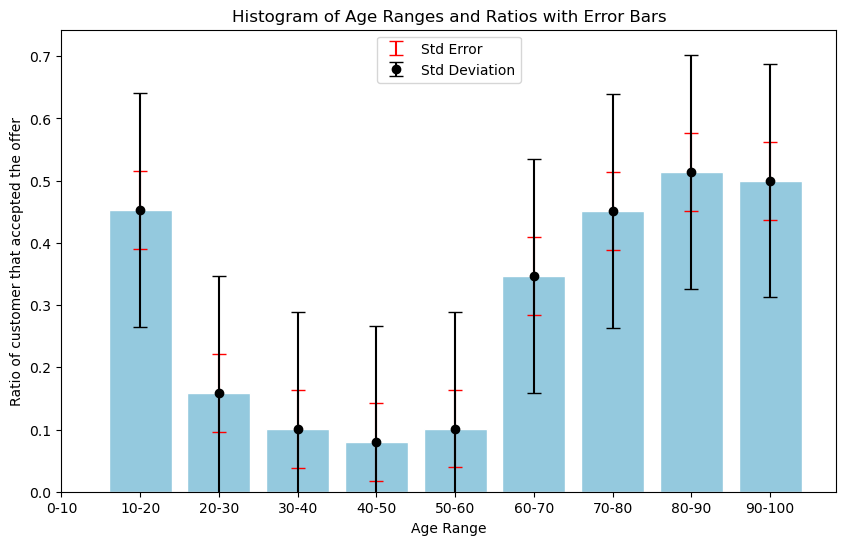

In [97]:
# Calculate standard deviation and standard error of the ratio
std_dev = result['ratio'].std(ddof=1)
std_error = std_dev / np.sqrt(len(result['ratio'].dropna()))

print("Standard Deviation:", std_dev)
print("Standard Error:", std_error)


#Create the plot
plt.figure(figsize=(10, 6))

# Plot bars with standard deviation error bars using Seaborn
ax = sns.barplot(x='age_range', y='ratio', data=result, color='skyblue', edgecolor='white')

# Add error bars for standard error
ax.errorbar(x=np.arange(len(result)), y=result['ratio'], yerr=std_error, fmt='none', c='red', capsize=5, label='Std Error')

# Add error bars for standard deviation (same value applied uniformly for demonstration purposes)
ax.errorbar(x=np.arange(len(result)), y=result['ratio'], yerr=[std_dev] * len(result), fmt='o', c='black', capsize=5, label='Std Deviation')

# Customize the plot
plt.xlabel('Age Range')
plt.ylabel('Ratio of customer that accepted the offer')
plt.title('Histogram of Age Ranges and Ratios with Error Bars')
plt.ylim(0, None)  # Set the y-axis limit to start at zero
plt.xticks(np.arange(len(result)), result['age_range'])

# Add a legend
plt.legend()

# Display the plot
plt.show()

**Standard deviation** measures the amount of variation or dispersion of a set of values. It quantifies the amount of variation or spread of data points from the mean (average).<br/>
**Standard error** measures the precision of an estimate or statistic, indicating how much the sample mean or other statistic is likely to vary from the true population parameter.

**The histogram above shows that people in their middle ages around (30 to 60) have a lower possibility of saying yes to the term deposit.The younger(around 20) and older people (80 to 100) are more likely to say yes. <br/>
Although the calls made to the middle ages are more than that of the two extremes.**

# <span style="color: skyblue; font-size: 1.0em; font-weight: bold;">Logistic Regression<span/>

**Logistic regression is a statistical model used for binary classification tasks, where the target variable 
𝑦.
y (also known as the dependent or response variable) is categorical with two possible outcomes, typically encoded as 0 and 1. The logistic regression model estimates the probability that a given observation belongs to a particular class (usually the positive class, labeled as 1).**

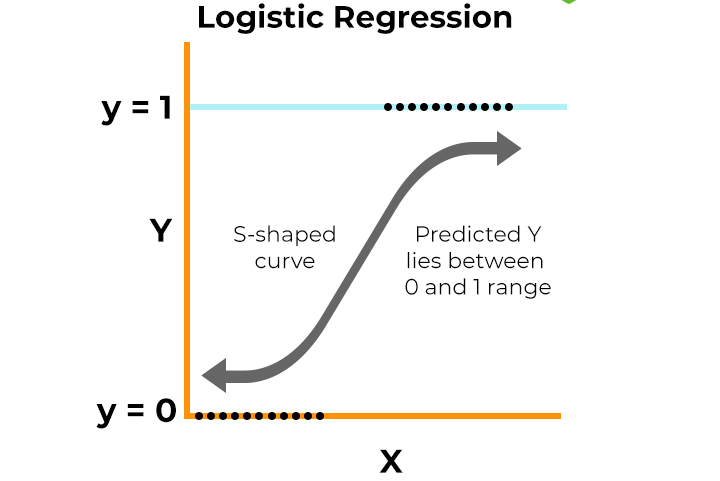

In [103]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**StandardScaler** makes all the features have the same average value (zero) and the same variation (one). It's like transforming all your data to a common unit of measurement, so when you use it in machine learning models, they can understand the data better and make more accurate predictions.

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

* *Initializing a logistic regression model with **L1 regularization** (penalty='l1') and uses the liblinear solver. L1 regularization helps in feature selection by shrinking the less important features' coefficients to zero.*<br/>
* ***random_state** is a crucial parameter in machine learning algorithms to control randomness and ensure consistent and reproducible results across different runs of the same algorithm on the same data.*<br/>
* *The Datasets (The balanced ones using smote) is split into training and testing data sets.*

In [107]:
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train, y_train)
selected_features_l1 = np.abs(model.coef_)[0] > 0
X_l1_train = X_train[:, selected_features_l1]
X_l1_test = X_test[:, selected_features_l1]
print("L1 Regularization Selected Features:", X.columns[selected_features_l1])

L1 Regularization Selected Features: Index(['Unnamed: 0', 'age', 'education', 'duration', 'campaign', 'pdays',
       'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'marital_unknown', 'h_loan_yes', 'p_loan_yes',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')


In [108]:
model.fit(X_l1_train, y_train)


LogisticRegression(penalty='l1', solver='liblinear')

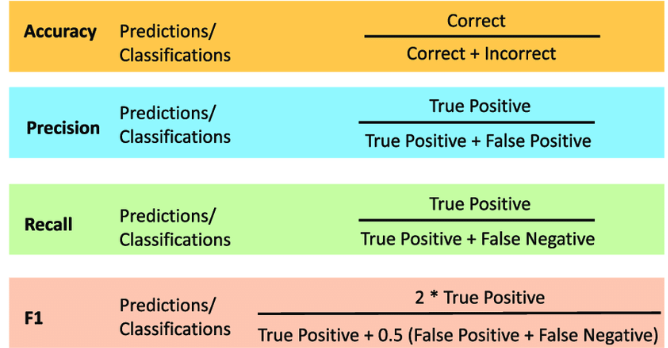

In [110]:
# Predict
y_pred_l1 = model.predict(X_l1_test)
y_pred = model.predict(X_l1_train)
# Evaluate
accuracy_test = accuracy_score(y_test, y_pred_l1)
accuracy_train= accuracy_score(y_train,y_pred)

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)


# Create a DataFrame
accuracy_df = pd.DataFrame({
    'Dataset': ['Training', 'Test'],
    'Accuracy': [accuracy_test, accuracy_train]
})

# Display the table

accuracy_df

,Dataset,Accuracy
0,Training,0.914588
1,Test,0.914632


***Precision**: The ratio of true positive predictions to the total predicted positives (i.e., how many of the predicted positives are actual positives).<br/>
**Recall (Sensitivity)**: The ratio of true positive predictions to the total actual positives (i.e., how many of the actual positives are correctly identified).<br/>
The **F1 score** is the harmonic mean of precision and recall, ensuring that a model only scores high if both precision and recall are high.*

**WHY DO WE USE F1 SCORE**<br/>
* *In datasets with imbalanced classes, metrics like accuracy can be misleading. For instance, in a dataset with 95% negatives and 5% positives, a model predicting all negatives would have 95% accuracy but would fail to identify any positives.The F1 score focuses on the performance of the positive class, providing a more meaningful evaluation in such scenarios.* <br/>
* *While precision and recall individually highlight different aspects of performance, the F1 score encapsulates both in a single metric, making it easier to compare models.*
* *It is particularly useful when the cost of false positives and false negatives is high or varies.<br/>
The F1 score helps in understanding the trade-offs between precision and recall. Improving one often leads to a decrease in the other, and the F1 score ensures that the model performs well on both fronts.*


In [111]:
# Evaluate F1 score
f1 = f1_score(y_test, y_pred_l1)

# Compute Precision and Recall
precision = precision_score(y_test, y_pred_l1)
recall = recall_score(y_test, y_pred_l1)


precision_train = precision_score(y_train, y_pred)
recall_train = recall_score(y_train, y_pred)
f1_train = f1_score(y_train, y_pred)

F1 Score: 0.9143379830779785
Precision: 0.9136276391554703
Recall: 0.9150494324423288


In [112]:
metrics_df = pd.DataFrame({
    'Dataset': ['Training', 'Test'],
    'Precision': [precision_train, precision],
    'Recall': [recall_train, recall],
    'F1 Score': [f1_train, f1]
})

# Formatting the 'Score' columns to 2 decimal places
metrics_df[['Precision', 'Recall', 'F1 Score']] = metrics_df[['Precision', 'Recall', 'F1 Score']].applymap("{:.2f}".format)

# Displaying the DataFrame
metrics_df

C:\Users\priya\AppData\Local\Temp\ipykernel_18000\2008444669.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  metrics_df[['Precision', 'Recall', 'F1 Score']] = metrics_df[['Precision', 'Recall', 'F1 Score']].applymap("{:.2f}".format)


,Dataset,Precision,Recall,F1 Score
0,Training,0.91,0.91,0.91
1,Test,0.91,0.92,0.91


In [113]:
# Compute cross-validation scores
cv_scores = cross_val_score(model, X_l1_test, y_test, cv=5).mean()  # Using 5-fold cross-validation
print("Mean Cross-Validation Scores:", cv_scores)


Mean Cross-Validation Scores: 0.9144967947668048



**Cross-Validation Process:**

* *The dataset is divided into k subsets (folds).*
* *The model is trained on k-1 folds and validated on the remaining fold.*
* *This process is repeated k times, with each fold used exactly once as the validation data.*

**Mean Cross-Validation Score:**

* *After performing k-fold cross-validation, the performance metric (such as accuracy, precision, recall, or F1 score) is computed for each fold.*
* *The mean of these performance metrics across all folds gives the mean cross-validation score.*
* *It provides an aggregated measure of how well the model is expected to perform on unseen data based on the cross-validation process.*

## <span style="color: skyblue; font-size: 1.0em; font-weight: bold;">Confusion matrix<span/>

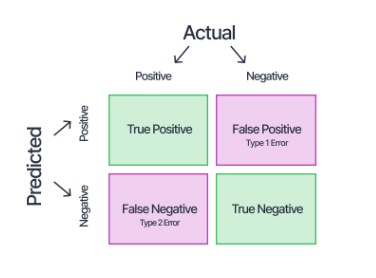

*A **confusion matrix** is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. It allows visualization of the performance of an algorithm by comparing predicted values with actual values.*

In [116]:
cm = confusion_matrix(y_test, y_pred_l1)

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]


In [117]:
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Positives (TP):", TP)

True Negatives (TN): 10060
False Positives (FP): 945
False Negatives (FN): 928
True Positives (TP): 9996


Confusion Matrix:
 [[10060   945]
 [  928  9996]]


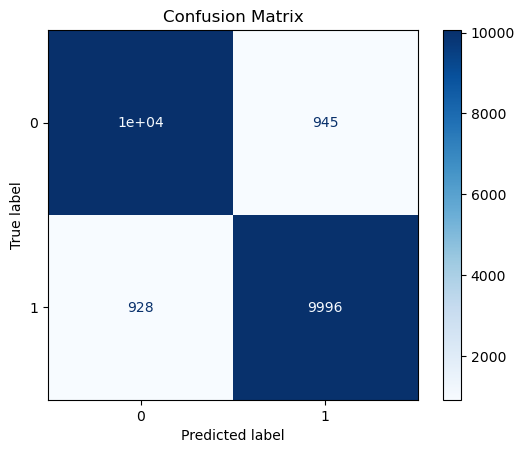

In [118]:
cm = confusion_matrix(y_test, y_pred_l1)


print("Confusion Matrix:\n", cm)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


# <span style="color: skyblue; font-size: 1.0em; font-weight: bold;">DecisionTree<span/>

**A decision tree is a supervised machine learning algorithm that models decisions based on a tree-like structure.**

*A decision tree is structured like a flowchart, where each internal node represents a "test" on an attribute (feature), each branch represents the outcome of the test, and each leaf node represents a class label or a numerical value (in case of regression).*

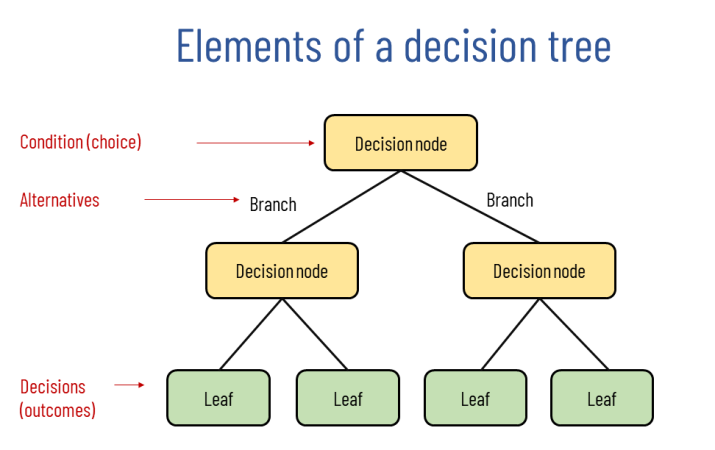

In [123]:
# Create and train the decision tree classifier with the best depth
clf = DecisionTreeClassifier(max_depth=25,random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=25, random_state=42)

In [124]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

# Create a DataFrame
accuracy_df = pd.DataFrame({
    'Dataset': ['Training', 'Test'],
    'Accuracy': [train_accuracy, test_accuracy]
})

# Display the table
accuracy_df

,Dataset,Accuracy
0,Training,0.914632
1,Test,0.914588


**Accuracy**

In [126]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f1_df = pd.DataFrame({
    'data':["Train","test"],
    'Precision': [precision_score(y_train, train_preds), precision],
    'Recall': [recall_score(y_train, train_preds), recall],
    'F1 Score': [f1_score(y_train, train_preds), f1]
})
f1_df

,data,Precision,Recall,F1 Score
0,Train,0.914767,0.914767,0.914767
1,test,0.915461,0.932808,0.924054


In [127]:
cv_scores = cross_val_score(clf, X_train, y_train, cv=5,scoring='accuracy').mean() # Using 5-fold cross-validation
print("Mean Cross-Validation Score:", cv_scores)

Mean Cross-Validation Score: 0.916840913344059


**Mean Cross-Validation Score**

Confusion Matrix:
 [[10064   941]
 [  734 10190]]


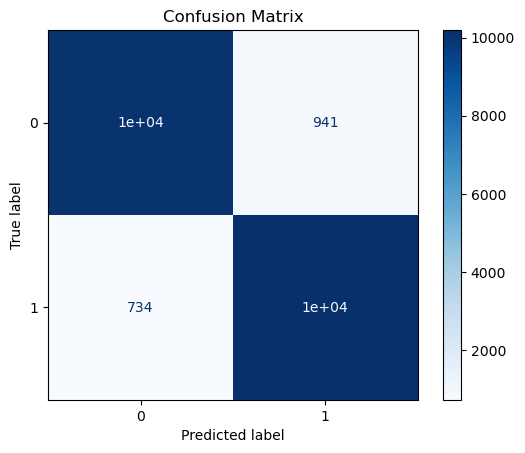

In [129]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()